Make sure you use the right version number.

In [ ]:
# %pip install --upgrade scikit-learn==0.23.0

Once installed, we can load the data.

In [17]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)

Next, we can apply models! 

In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

mod = LinearRegression()
mod.fit(X, y)
mod.predict(X)[:]

array([-4.55748245e-02,  1.57869645e-01, -1.31319863e-01, -1.92288185e-01,
        1.65553403e-01,  3.01137442e-01,  1.50292603e-01,  3.68008882e-01,
        3.01789947e-01, -1.54652777e-01,  4.52284915e-01,  1.41528218e-01,
        3.58799952e-01,  5.42350255e-01,  3.74158760e-01,  6.59600231e-03,
        2.00106593e-01, -1.59903421e-02, -6.86648217e-02,  6.72592533e-01,
        1.02825052e+00,  1.12677621e+00,  2.64794750e-01,  1.48388507e-02,
       -1.56499389e-01, -1.81494969e-01,  7.15639403e-02,  1.05751382e-01,
        4.69024100e-03,  4.64984176e-01, -6.42440721e-02,  8.49150658e-02,
       -1.09544105e-01,  4.72282004e-03,  8.30995041e-02,  1.06438245e-01,
        4.10004938e-01,  1.00702985e+00,  7.26754362e-01,  4.37172612e-01,
        6.74438947e-01,  5.68674205e-01, -2.03827234e-01,  3.31302150e-01,
        3.41861785e-01, -7.01785970e-02,  1.29121705e+00,  1.86405824e-01,
        8.88890773e-01,  6.88486808e-01,  9.57028129e-01,  9.28752105e-01,
        9.27637316e-01,  

In [19]:
mod = KNeighborsRegressor()
mod.fit(X, y)
pred = mod.predict(X)

Maybe we should inspect the results.

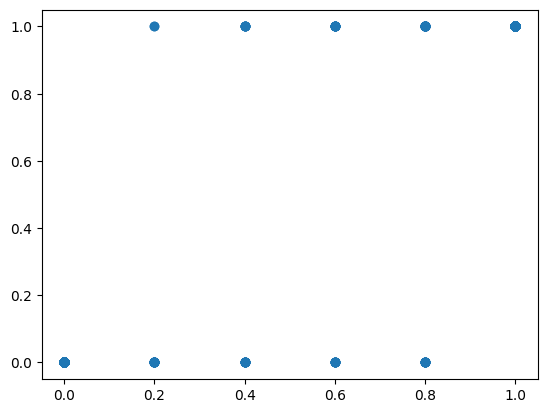

In [20]:
import matplotlib.pylab as plt

plt.scatter(pred, y)

Let's put everything into a pipeline.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from sklearn.pipeline import Pipeline
import matplotlib.pylab as plt

X, y = load_boston(return_X_y=True)

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor())
])
pred = pipe.fit(X, y).predict(X)
plt.scatter(pred, y)

Let's also apply some settings!

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from sklearn.pipeline import Pipeline
import matplotlib.pylab as plt

X, y = load_boston(return_X_y=True)

# If n_neighbors = 1, we're totally cheating with the chart below.
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=1))
])
pred = pipe.fit(X, y).predict(X)
plt.scatter(pred, y)

Let's now use a gridsearch!

In [ ]:
from sklearn.datasets import load_boston
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd

mod = GridSearchCV(estimator=pipe,
                 param_grid={
                   'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
                 },
                 cv=3)
mod.fit(X, y);

In [ ]:
pd.DataFrame(mod.cv_results_)

Finally, lets remember that we should look at the data.

In [ ]:
print(load_boston()['DESCR'])